In [1]:
library(help = 'datasets')

- Vyberte si vhodná data (například Animals2 v knihovně robustbase nebo cars v knihovně datasets) a pokuste se zvolit vysvětlující proměnné (případně jejich transformace) tak, aby byla závisle proměnné co nejlépe vysvětlená. 

Data jsou ze měření mitochondrií. Pro jeden mitochondrion máme změřený její objem a objem její krist. 

In [8]:
mitochondria <- read.csv(file = 'volumes_measures_with_vox_size.csv')
head(mitochondria)

,X..N,Whole.volume,Cristae.volume,Cristae.volume.Whole.volume
,<int>,<dbl>,<dbl>,<dbl>
1,0,28644157,1979346,0.06910121
2,1,73814265,7244208,0.09814102
3,2,75213377,9034525,0.12011859
4,3,89663666,8503791,0.09484100
5,4,103693084,6659172,0.06422002
6,5,31113424,2428226,0.07804431


- Nakreslete graf s původními daty včetně proložených hodnot (fitted values) z navrženého lineárního modelu.

In [7]:
library(RColorBrewer)

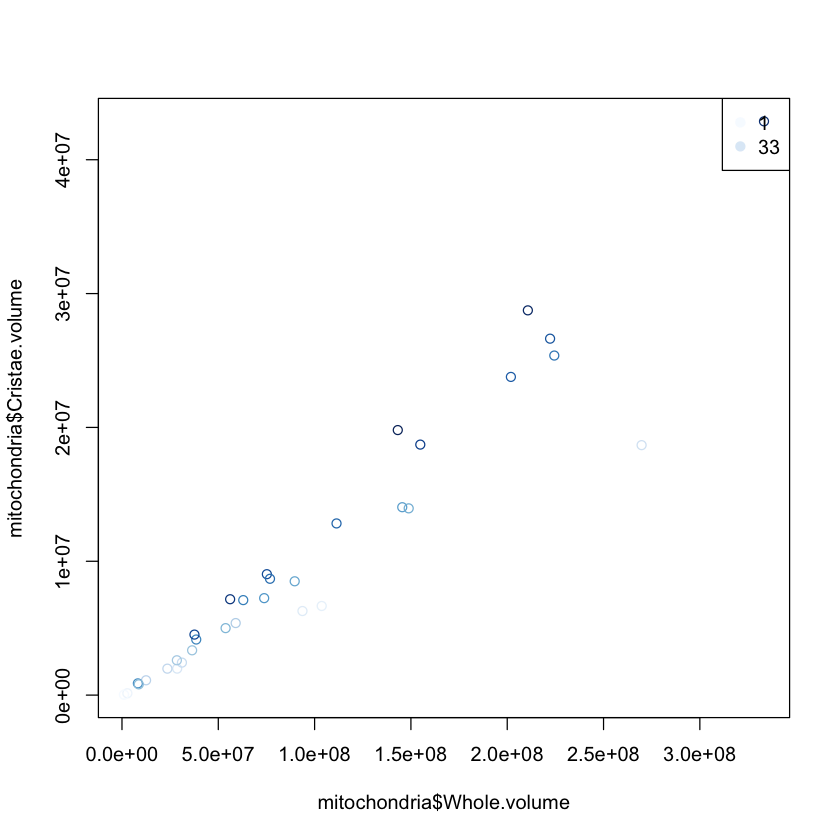

In [31]:
relative = mitochondria$Cristae.volume.Whole.volume

# Define colour pallete
pal = colorRampPalette(c("blue", "red"))

# Use the following line with RColorBrewer
cols = brewer.pal(9, "Blues")

# Define colour pallete
pal = colorRampPalette(c("blue", "red"))

# Use the following line with RColorBrewer
pal = colorRampPalette(cols)

# Rank variable for colour assignment
relative = findInterval(relative, sort(relative))

# Make plot
plot(mitochondria$Whole.volume, mitochondria$Cristae.volume, col=pal(nrow(mitochondria))[relative])
# plot(mitochondria$Whole.volume, mitochondria$Cristae.volume)

# Add a simple legend
legend("topright", col=pal(9), pch=19, legend=c(round(range(relative), 1)))

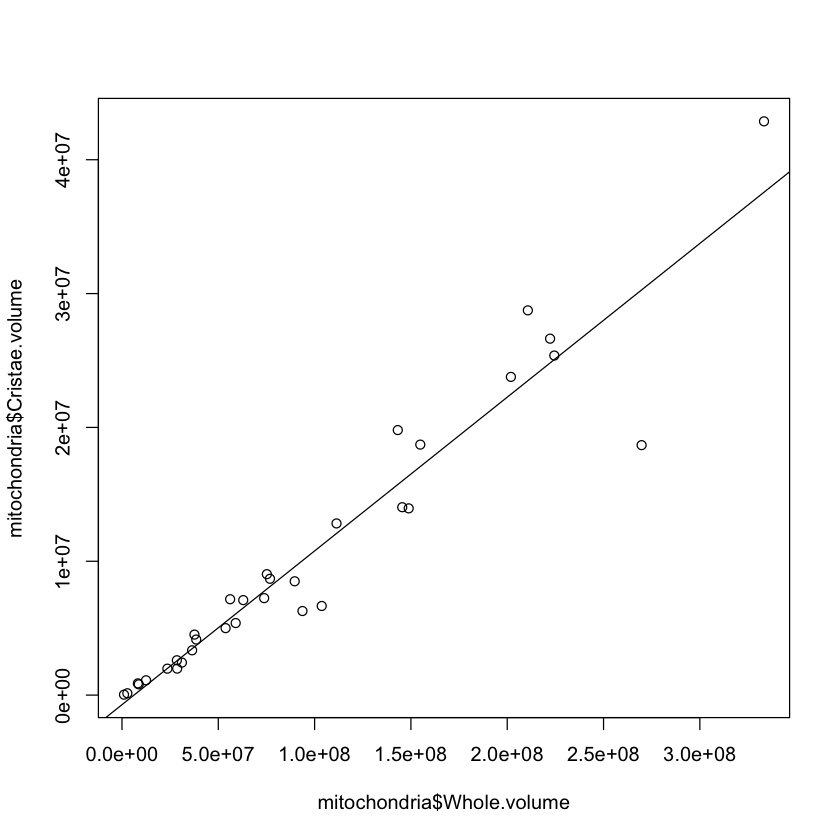

In [45]:
lm1 = lm(formula = mitochondria$Cristae.volume ~ mitochondria$Whole.volume, data=mitochondria)
plot(mitochondria$Cristae.volume ~ mitochondria$Whole.volume)
abline(lm1)

Můžeme zobrazit i třetí odmocninu z objemů.

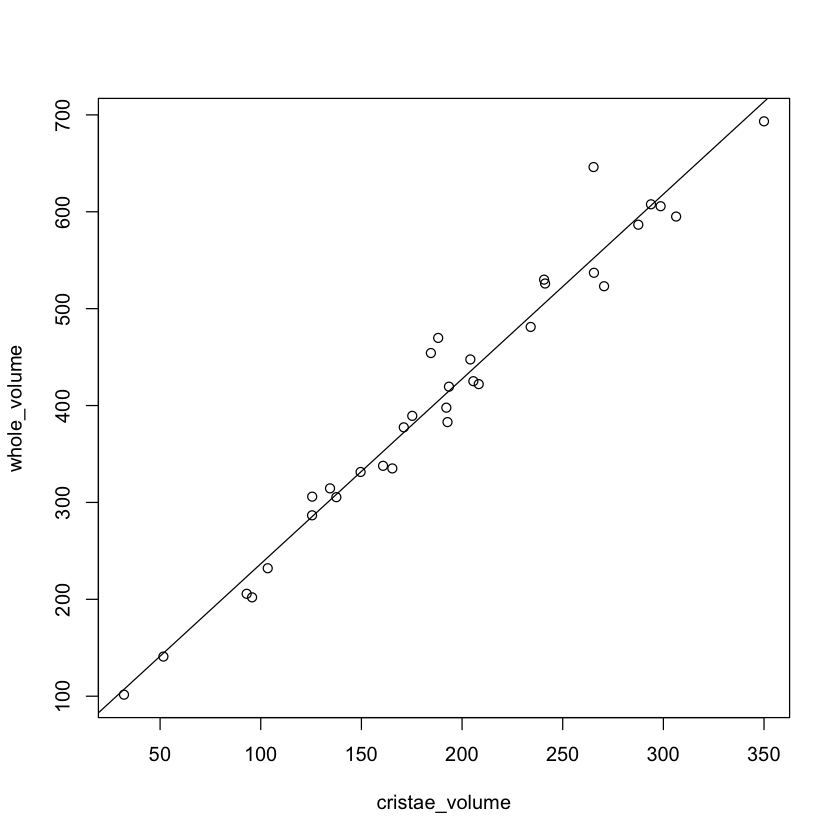

In [53]:
cristae_volume = mitochondria$Cristae.volume
whole_volume = mitochondria$Whole.volume

cristae_volume = cristae_volume^(1/3)
whole_volume = whole_volume^(1/3)

lm1 = lm(formula = whole_volume ~ cristae_volume, data=mitochondria)
plot(whole_volume ~ cristae_volume)
abline(lm1)

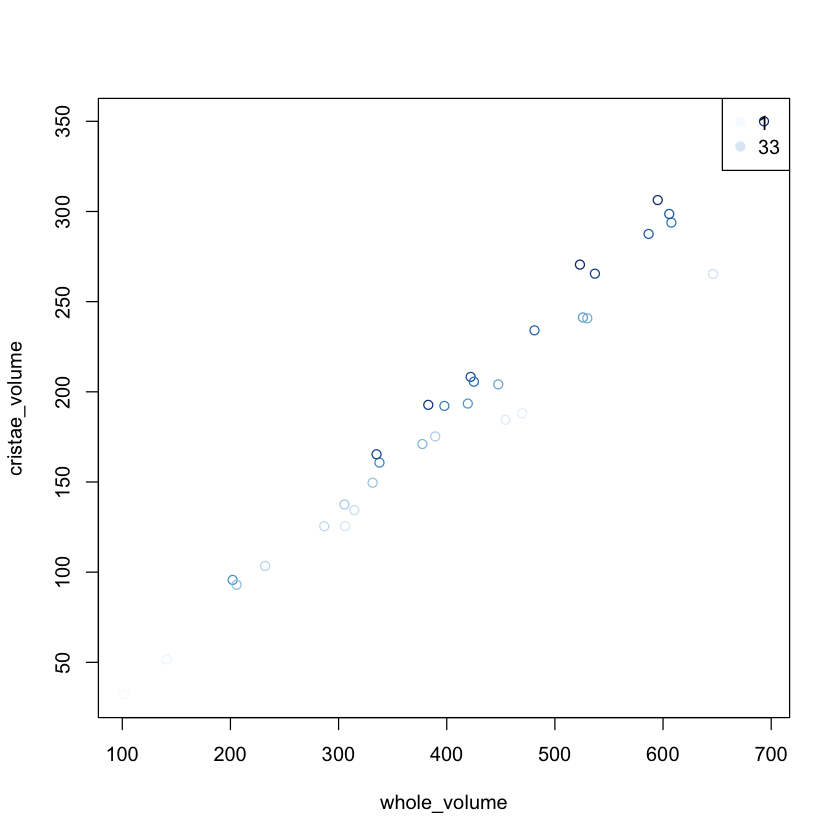

In [52]:
relative = mitochondria$Cristae.volume.Whole.volume

# Define colour pallete
pal = colorRampPalette(c("blue", "red"))

# Use the following line with RColorBrewer
cols = brewer.pal(9, "Blues")

# Define colour pallete
pal = colorRampPalette(c("blue", "red"))

# Use the following line with RColorBrewer
pal = colorRampPalette(cols)

# Rank variable for colour assignment
relative = findInterval(relative, sort(relative))

# Make plot
plot(whole_volume, cristae_volume, col=pal(nrow(mitochondria))[relative])
# plot(mitochondria$Whole.volume, mitochondria$Cristae.volume)

# Add a simple legend
legend("topright", col=pal(9), pch=19, legend=c(round(range(relative), 1)))

Okomentujte statistickou významnost odhadnutých koeficientů. Otestujte nulovou hypotézu, že jsou všechny regresní koeficienty nulové 
(například pomocí funkce anova()).

In [54]:
summary(lm1)


Call:
lm(formula = whole_volume ~ cristae_volume, data = mitochondria)

Residuals:
    Min      1Q  Median      3Q     Max 
-38.873 -15.405  -5.496   9.108  94.083 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    45.90741   13.81387   3.323  0.00229 ** 
cristae_volume  1.90772    0.06697  28.486  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 28.77 on 31 degrees of freedom
Multiple R-squared:  0.9632,	Adjusted R-squared:  0.962 
F-statistic: 811.5 on 1 and 31 DF,  p-value: < 2.2e-16


In [64]:
anova(lm1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
cristae_volume,1,671837.09,671837.0922,811.4804,8.517771e-24
Residuals,31,25665.38,827.9153,NA,NA


Vypočítejte residua a na základě vhodných grafů okomentujte splnění předpokladů použitého modelu (heteroskedasticita, normalita, tvar regresního modelu, apod).

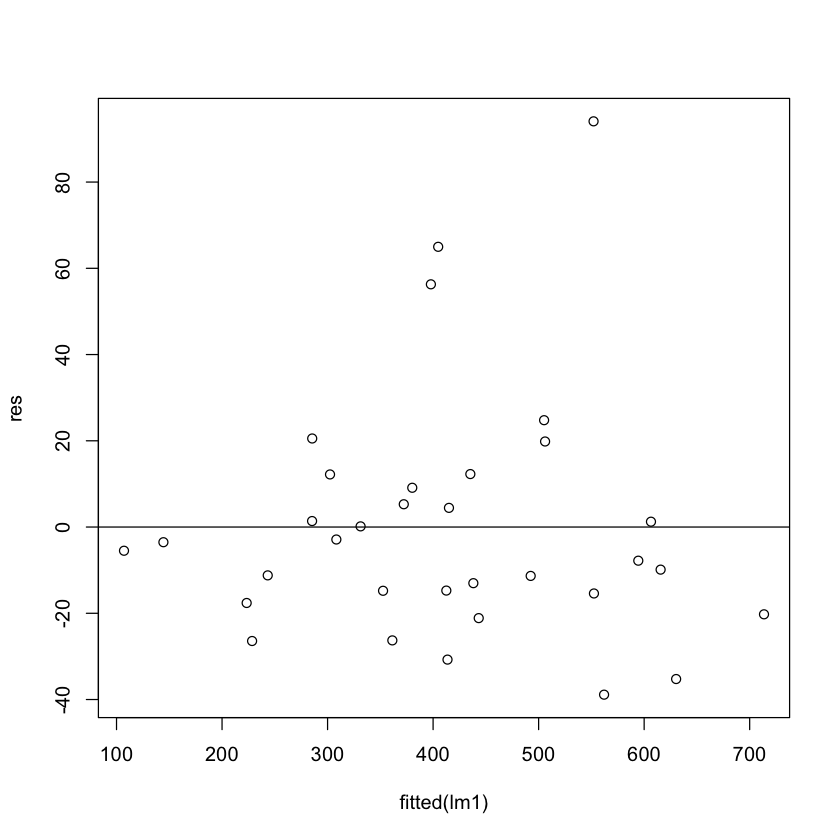

In [63]:
res = resid(lm1)

#produce residual vs. fitted plot
plot(fitted(lm1), res)

#add a horizontal line at 0 
abline(0,0)

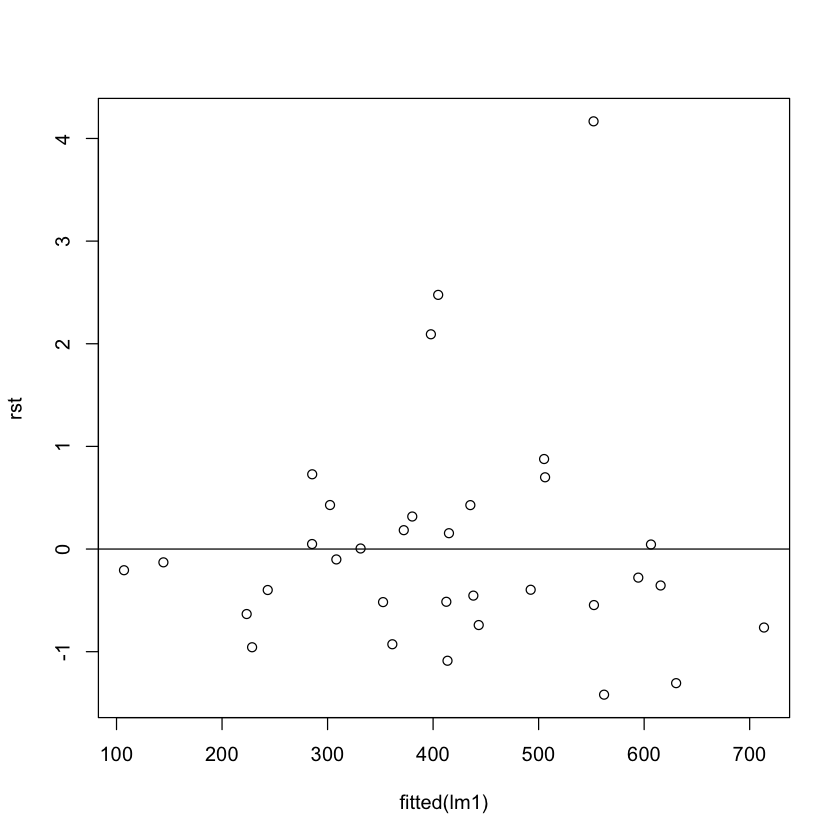

In [69]:
rst = rstudent(lm1)
plot(fitted(lm1), rst)
abline(0,0)